In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D
from blackjack import *

In [2]:
def mcOnPolicyFirstVisit(num_episodes):
    #create BlackJack object
    blackjack = BlackJack()
    # initialze counts to 0 
    usable_ace_states, usable_ace_states_cnt = np.zeros((10, 10)), np.zeros((10, 10))
    no_usable_ace_states, no_usable_ace_states_cnt = np.zeros((10, 10)),np.zeros((10, 10))
    
    for i in trange(0, num_episodes):
        _, reward, player_seq_plays = blackjack.playGame()
        for (usable_ace, player_state, dealer_card), _ in player_seq_plays:
            player_state -= 12
            dealer_card -= 1
            if not usable_ace:
                no_usable_ace_states_cnt[player_state, dealer_card] += 1
                no_usable_ace_states[player_state, dealer_card] += reward
            else:
                usable_ace_states_cnt[player_state, dealer_card] += 1
                usable_ace_states[player_state, dealer_card] += reward
                
    usable_ace_states_cnt += 1
    no_usable_ace_states_cnt += 1
    
    usable_ace_states = usable_ace_states / usable_ace_states_cnt
    no_usable_ace_states = no_usable_ace_states / no_usable_ace_states_cnt
    
    return usable_ace_states, no_usable_ace_states

In [3]:
def plot3dValues(usable_ace_states, no_usable_ace_states,titles):
    states = [usable_ace_states, no_usable_ace_states]
    x = np.arange(1,11)
    y = np.arange(12,22)
    x,y = np.meshgrid(x,y)
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(111,projection='3d')
    #_, ax = plt.subplot(121,projection='3d')
    
    surf1 = ax1.plot_surface(x,y,states[0],rstride=1,cstride=1,cmap = mpl.cm.coolwarm,linewidth=0,antialiased=False)
    ax1.set_xlabel('Dealer showing')
    ax1.set_ylabel('Player State')
    ax1.set_title(titles[0])
    plt.show()
    fig2 = plt.figure(figsize = (30,10))
    ax2 = fig2.add_subplot(121,projection='3d')
    surf2 = ax2.plot_surface(x,y,states[1],rstride=1,cstride=1,cmap = mpl.cm.coolwarm,linewidth=0,antialiased=False)
    ax2.set_xlabel('Dealer showing')
    ax2.set_ylabel('Player State')
    ax2.set_title(titles[1])
    
    #fig.colorbar(surf1,shrink = 0.5, aspect = 5)
    plt.show()

In [5]:
def figure5_1():
    usable_ace_states1, no_usable_ace_states1 = mcOnPolicyFirstVisit(10000)
    titles = ['Usable Ace, 10000 Episodes', 'No Usable Ace, 10000 Episodes']
    plot3dValues(usable_ace_states1, no_usable_ace_states1,titles)          
    usable_ace_states2, no_usable_ace_states2 = mcOnPolicyFirstVisit(500000)
    titles = ['Usable Ace, 500000 Episodes', 'No Usable Ace, 500000 Episodes']
    plot3dValues(usable_ace_states2, no_usable_ace_states2,titles)         

100%|██████████| 10000/10000 [00:00<00:00, 63812.56it/s]


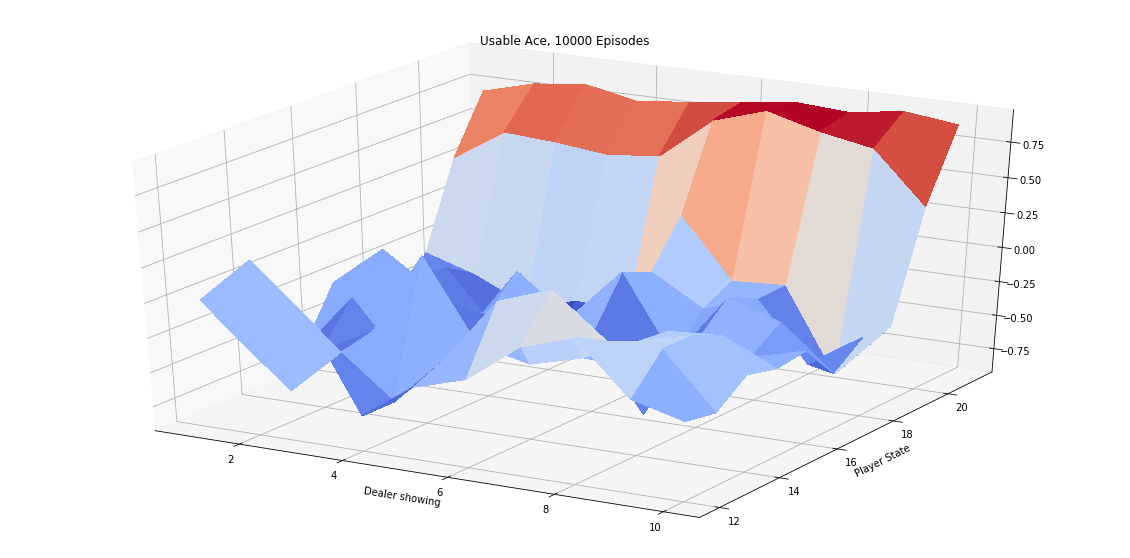

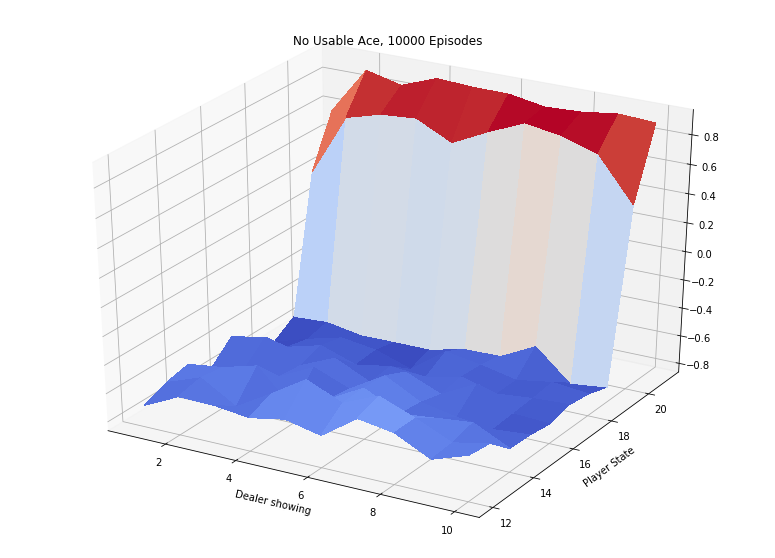

100%|██████████| 500000/500000 [00:06<00:00, 74099.51it/s]


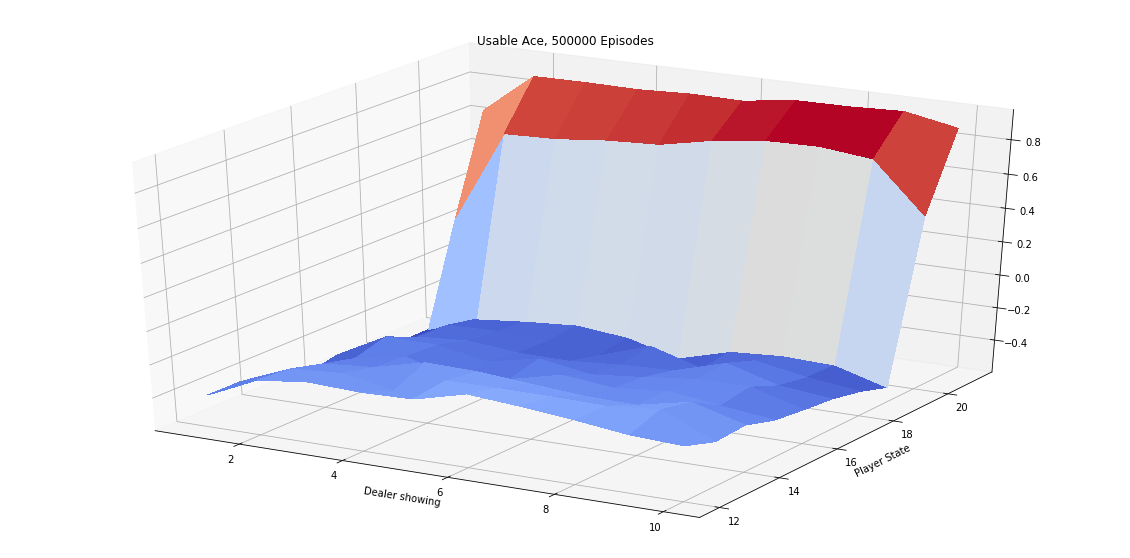

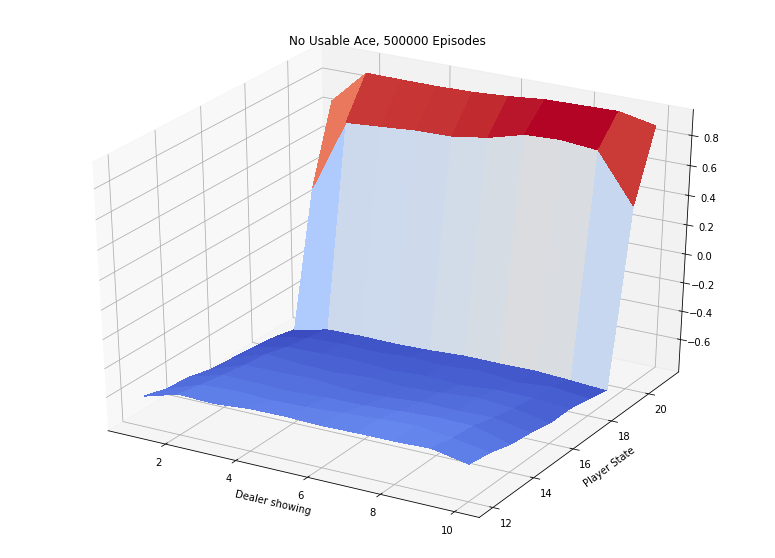

In [6]:
figure5_1()

In [32]:
print(mpl.__version__)

3.0.3
